# Please read:

We have already defined the dataset below. 
And also have defined X_train and y_train. Please build a model and test it with X_test.


You should build a neural network model in Keras.

# Section A

In [248]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [249]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


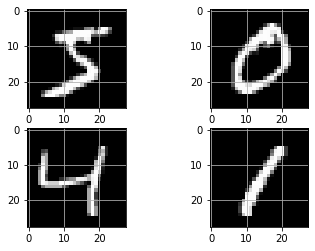

In [250]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

In [ ]:
# In the preceding code, we are importing the relevant Keras files and are also importing the MNIST dataset 
#(which is provided as a built-in dataset in Keras). 

# The MNIST dataset contains images of digits where the images are of 28 x 28 in shape. 
# You can see in the plots what they will look like.

# Section B - HW Neural Network starts here

In [191]:
# 1. Import the relevant packages and datasets

In [251]:
from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import SGD

In [ ]:
#2. Preprocess the targets (convert them into one-hot encoded vectors) so that we can perform optimization on top of them:
#We shall be minimizing categorical cross entropy loss

#- 2points

In [252]:
#Targets can be converted into one hot encoded using numpy utils.to_categorical
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)
print(X_train.shape)

(10000, 10)
(60000, 28, 28)


In [253]:
classes = 10# Number of output classes 

In [254]:
#Reshaping 28*28 pixels into 784 vector
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
print(X_test.shape)
print(X_train.shape)

(10000, 784)
(60000, 784)


In [ ]:
#3. Initialize a model - 1 point

In [255]:
#Initialising model
model = Sequential()
model.add(Dense(num_pixels,input_dim = num_pixels,activation='relu')) # Hidden layer
model.add(Dense(64,activation='relu')) # Hidden layer
model.add(Dense(32,activation='relu')) # Hidden layer
model.add(Dense(10,activation='softmax')) # Output layer
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the model architecture:
Specify the number of units in a hidden layer
Specify the activation function that is to be performed in a hidden layer
Specify the number of hidden layers
Specify the loss function that we want to minimize
Provide the optimizer that will minimize the loss function

In [ ]:
#5. Fit the model 

Model Architecture :
    There are 3 hidden layers with number of units = number of pixels(784) in first hidden layer and units = 64 in second hidden layer and units = 32 in third hidden layer. Rectifier Activation function is used for hidden layers
    Output layer predicts one class of the 10 as the model’s output prediction.Softmax activation function is used in Output layer
    As it is multiclass classification categorical_crossentropy(logarithmic loss function) in Keras is used as loss function 
    ADAM gradient descent algorithm is used as optimiser to learn the weights.
    Metric Accuracy is used to judge the model

In [256]:
model.fit(X_train, y_train, epochs=10, batch_size = 200,verbose=2)
#model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
300/300 - 10s - loss: 2.3134 - accuracy: 0.7937
Epoch 2/10
300/300 - 10s - loss: 0.3453 - accuracy: 0.9141
Epoch 3/10
300/300 - 10s - loss: 0.2245 - accuracy: 0.9427
Epoch 4/10
300/300 - 10s - loss: 0.1602 - accuracy: 0.9581
Epoch 5/10
300/300 - 11s - loss: 0.1267 - accuracy: 0.9654
Epoch 6/10
300/300 - 10s - loss: 0.0980 - accuracy: 0.9735
Epoch 7/10
300/300 - 8s - loss: 0.0823 - accuracy: 0.9764
Epoch 8/10
300/300 - 8s - loss: 0.0802 - accuracy: 0.9786
Epoch 9/10
300/300 - 8s - loss: 0.0721 - accuracy: 0.9804
Epoch 10/10
300/300 - 8s - loss: 0.0508 - accuracy: 0.9850


In [ ]:
#6. Test the model

In [257]:
model.evaluate(X_train, y_train, verbose=False)
# Model training is 98.5% accurate and loss value is 0.04.

[0.04594748467206955, 0.9865833520889282]

In [267]:
y_pred = np.argmax(model.predict(X_test), axis = -1) # Predicting using model
y_pred[1]

2

In [ ]:
#7. Calculate the accuracy and loss values on top of the test dataset - 2 points

In [259]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores
# Accuracy of the model is 97% and loss calculated is 0.15

[0.15279702842235565, 0.9679999947547913]

Units in first hidden layer = 64
Batch size = 32
With 5 hidden layers loss is 0.12 and accuracy is 96.7%
With 3 hidden layers accuracy is 95.6%
With 1 hidden layer accuracy is 96%

Batch size = 200
With 1 hidden layers accuracy is 95%

Units in first hidden layer = number of pixels
Batch size = 200
With 3  hidden layers accuracy is 97% witl loss of 0.17



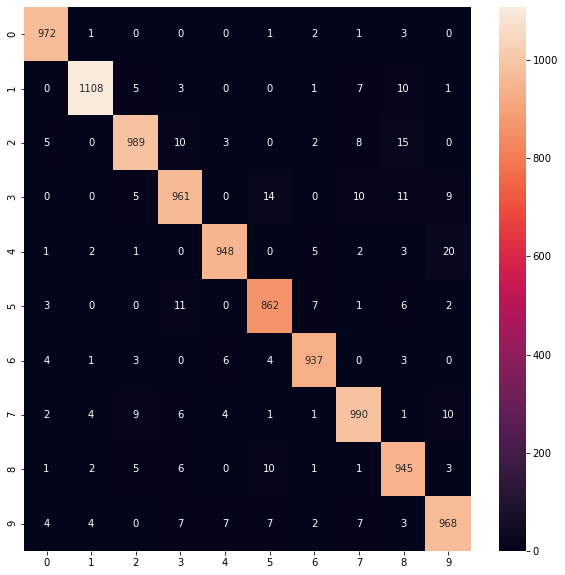

In [272]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
rounded_labels=np.argmax(y_test, axis=1) # Converting y_test to have dimensions same as y_pred
fig, ax = plt.subplots(figsize=(10,10))
c_matrix=confusion_matrix(rounded_labels, y_pred)
ax=sns.heatmap(c_matrix, annot=True, fmt='g')

# HW - Decision Trees

### Please follow the instructions given during the class/demo

### Load sklearn's wine dataset and perform classification using Decision trees. Try different pruning techniques, criteria to split the tree which gives you best results. Plot the three and comment on your findings.

In [273]:
#Loading packages
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

In [323]:
# Loading data
from sklearn.datasets import load_wine
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [324]:
# Using entropy as attribute selection measure
#Information gain uses the entropy measure as the impurity measure and 
#splits a node such that it gives the most amount of information gain
#“best” splitter it evaluate all splits using the criterion before splitting whereas the “random” splitter uses a random uniform function
clf = DecisionTreeClassifier(criterion="entropy", splitter = "random",max_depth=4, min_samples_split = 3)# best splitter is overfitting model 
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test data set")
print(accuracy_score(y_test, y_pred))
print("\n")
print("Accuracy on training data set")
print(accuracy_score(y_train, clf.predict(X_train)))

Accuracy on test data set
0.9629629629629629


Accuracy on training data set
0.9838709677419355


In [325]:
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test, y_pred))


96.29629629629629
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



In [326]:
#Predicted values
y_pred

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0])

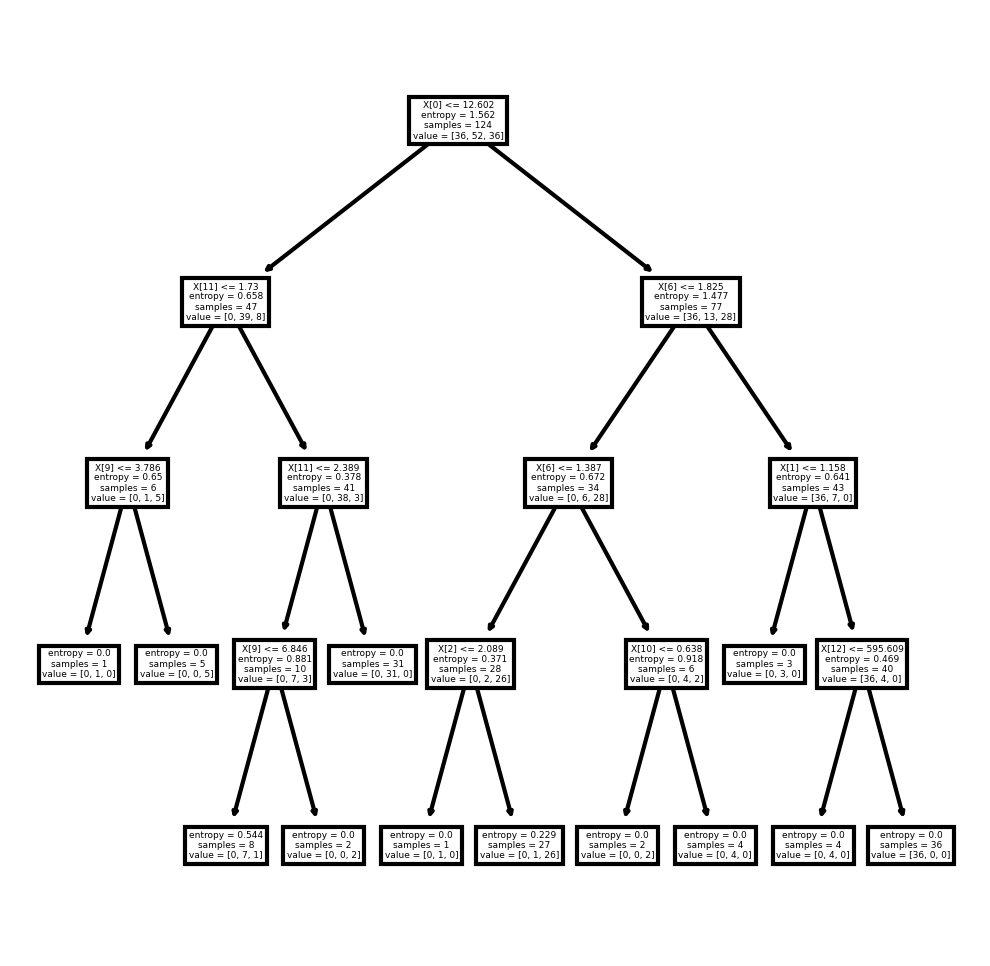

In [327]:
#Plotting tree
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf);

In [309]:
#Loading dataset
from sklearn.datasets import load_wine
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


In [310]:
# Using gini as attribute selection measure
clf = DecisionTreeClassifier(criterion="gini", splitter = "random",max_depth=4, min_samples_split = 3)# Best splitter is overfiitng the model
#Gini Impurity measures the divergences between the probability distributions of the target attribute’s values and 
#splits a node such that it gives the least amount of impurity.
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on test data set")
print(accuracy_score(y_test, y_pred))
print("\n")
print("Accuracy on training data set")
print(accuracy_score(y_train, clf.predict(X_train)))

Accuracy on test data set
0.9444444444444444


Accuracy on training data set
0.971830985915493


In [311]:
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test, y_pred))

94.44444444444444
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



In [312]:
#Predicted values
y_pred

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1])

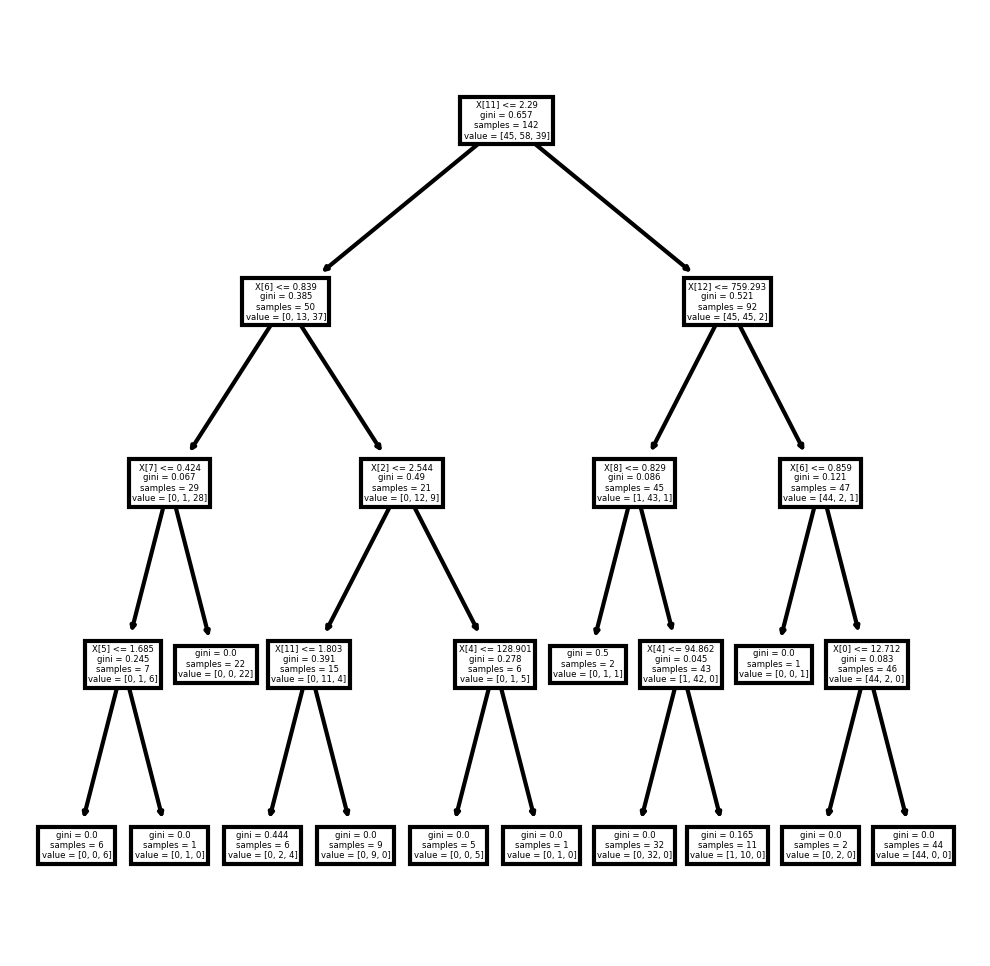

In [313]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf);